# SIMPLE LINEAR REGRESSION 
### USING SKLEARN LIBRARY
   USING PYTHON

Using the dataset -- Years of Experience V/S Salary

In [2]:
# importing Libraries
import numpy as np      # for working with arrays
import pandas as pd     # for dealing with DataFrames
import matplotlib.pyplot as plt     # for Data Visualisation

In [3]:
# loading the Training Dataset into Pandas.DataFrame
df_train = pd.read_csv("G://machine learning//SalaryData_Train.csv")

In [4]:
df_train.head(10) # prints the first 10 Rows from the dataset

,years,salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [5]:
# Printing the Shape of Dataset
print(df_train.shape)

(30, 2)


In [6]:
# Information about the Training DataFrame
df_train.info()

# Since there are no null values, we can proceed further

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
years     30 non-null float64
salary    30 non-null int64
dtypes: float64(1), int64(1)
memory usage: 544.0 bytes


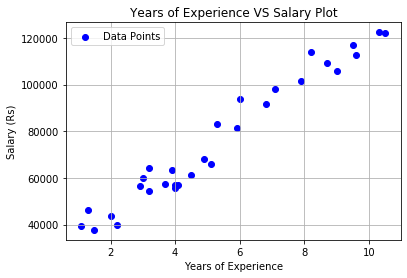

In [7]:
# Visualising the data
plt.scatter(df_train["years"],df_train["salary"],color='b')   # creates a Scatter Plot
plt.xlabel("Years of Experience")
plt.ylabel("Salary (Rs)")
plt.legend(["Data Points"])
plt.title("Years of Experience VS Salary Plot")
plt.grid()
plt.show()

In [8]:
years = np.array(df_train["years"])  # independent variable ... called  Feature
salary = np.array(df_train["salary"])  # dependent variable ... called  Label

In [9]:
# sampling the data

from sklearn.model_selection import train_test_split

# It splits the dataset into training (70% of dataset)
# and testing data (30% of dataset).

x_train, x_test, y_train, y_test = train_test_split(years, salary, test_size=0.3, random_state=0, shuffle=True)

In [10]:
print("shape of train dataset ",x_train.shape)
print("shape of test dataset ",x_test.shape)

print("\ndata-type of x_train :",type(x_train))

shape of train dataset  (21,)
shape of test dataset  (9,)

data-type of x_train : <class 'numpy.ndarray'>


In [11]:
from sklearn.linear_model import LinearRegression

# Create an object of Linear Regression module
reg = LinearRegression()

In [12]:
# Fitting our Training Dataset into the Linear Regression model

reg.fit(x_train, y_train)  # --->> ERROR

# However, we get error as x_train, y_train are 1-Dimensional arrays.
# But, reg.fit() expects  2-Dimensional arrays.

# Therefore, we reshape x_train, y_train.

ValueError: Expected 2D array, got 1D array instead:
array=[ 7.9  2.9  5.1  3.2  4.5  8.2  6.8  1.3 10.5  3.   2.2  5.9  6.   3.7
  3.2  9.   2.   1.1  7.1  4.9  4. ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [13]:
x_train = x_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)

In [14]:
# Fitting our Training Dataset into the Linear Regression model
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
# predicting the y_train for the model
predicted_y = reg.predict(x_train)

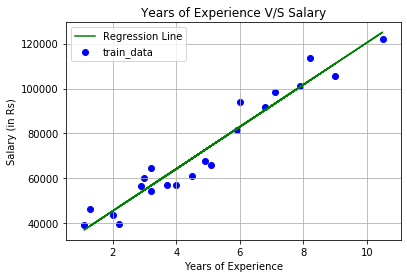

In [43]:
# Visualising the Regression Line and train_data
plt.plot(x_train, predicted_y, color='g')
plt.scatter(x_train, y_train, color='b')
plt.xlabel('Years of Experience')
plt.ylabel("Salary (in Rs)")
plt.legend(["Regression Line","train_data"])
plt.title("Years of Experience V/S Salary")
plt.grid()
plt.show()

In [16]:
# We can get SLOPE (m) of the Regression Line using reg.coef_
print("m = ", reg.coef_)

# We can get Y-INTERCEPT of the Regression Line using reg.intercept_
print("c = ",reg.intercept_)

m =  [[9360.26128619]]
c =  [26777.3913412]


In [17]:
# Checking the Accuracy of the model using reg.score().
# It returns the coefficient of determination R^2 of the prediction.

print("Accuracy of Train dataset = ",reg.score(x_train,y_train))

# The best possible score is 1.0 .
# It can even be negative (for arbitrarily worse model).

Accuracy of Train dataset =  0.9423777652193379


In [18]:
# Testing the Linear Regression model on test dataset
df_test = pd.read_csv("G://machine learning//SalaryData_Test.csv")

# Checking the shape of the testing dataset
print("shape of df_test : ",df_test.shape)

shape of df_test :  (6, 2)


In [19]:
# Checking the dataset for any Null values
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
years     6 non-null float64
salary    0 non-null float64
dtypes: float64(2)
memory usage: 160.0 bytes


In [21]:
# Counting the total number of Null values in each Column
df_test.isnull().sum()

years     0
salary    6
dtype: int64

In [38]:
x_test = np.array(df_test["years"])

x_test = x_test.reshape(-1,1)

In [47]:
# Predicting the Salary for x_test i.e. testing dataset
y_pred_test = reg.predict(x_test)

# and copying the predicted values into the "salary" column
df_test["salary"] = y_pred_test

In [48]:
# Print the final DataFrame after predicting the "salary"
print(df_test)

   years         salary
0    3.3   57666.253586
1    3.5   59538.305843
2    7.8   99787.429374
3    9.0  111019.742917
4   10.0  120380.004203
5    6.0   82938.959058


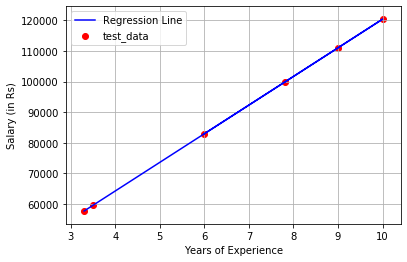

In [53]:
# Visualising the data
plt.plot(x_test, y_pred_test, color='b')
plt.scatter(df_test["years"], df_test["salary"], color='r')
plt.xlabel("Years of Experience")
plt.ylabel("Salary (in Rs)")
plt.legend(["Regression Line", "test_data"])
plt.grid()
plt.show()

### Made By : Karansinh Padhiar